## Diagram to Explain Identity Islands

In [38]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import random

### Load Graph

In [39]:
with open('../data/synthetic_data/synthetic_identity_islands.gpickle', 'rb') as f:
    G = pickle.load(f)

print("Synthetic data read complete.")

# Check the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes in the graph: {num_nodes}")
print(f"Number of edges in the graph: {num_edges}")

with open('../data/synthetic_data/identity_islands.pkl', 'rb') as f:
    identity_islands = pickle.load(f)

# Select a sample island
sample_island = random.choice(identity_islands)

Synthetic data read complete.
Number of nodes in the graph: 102
Number of edges in the graph: 118


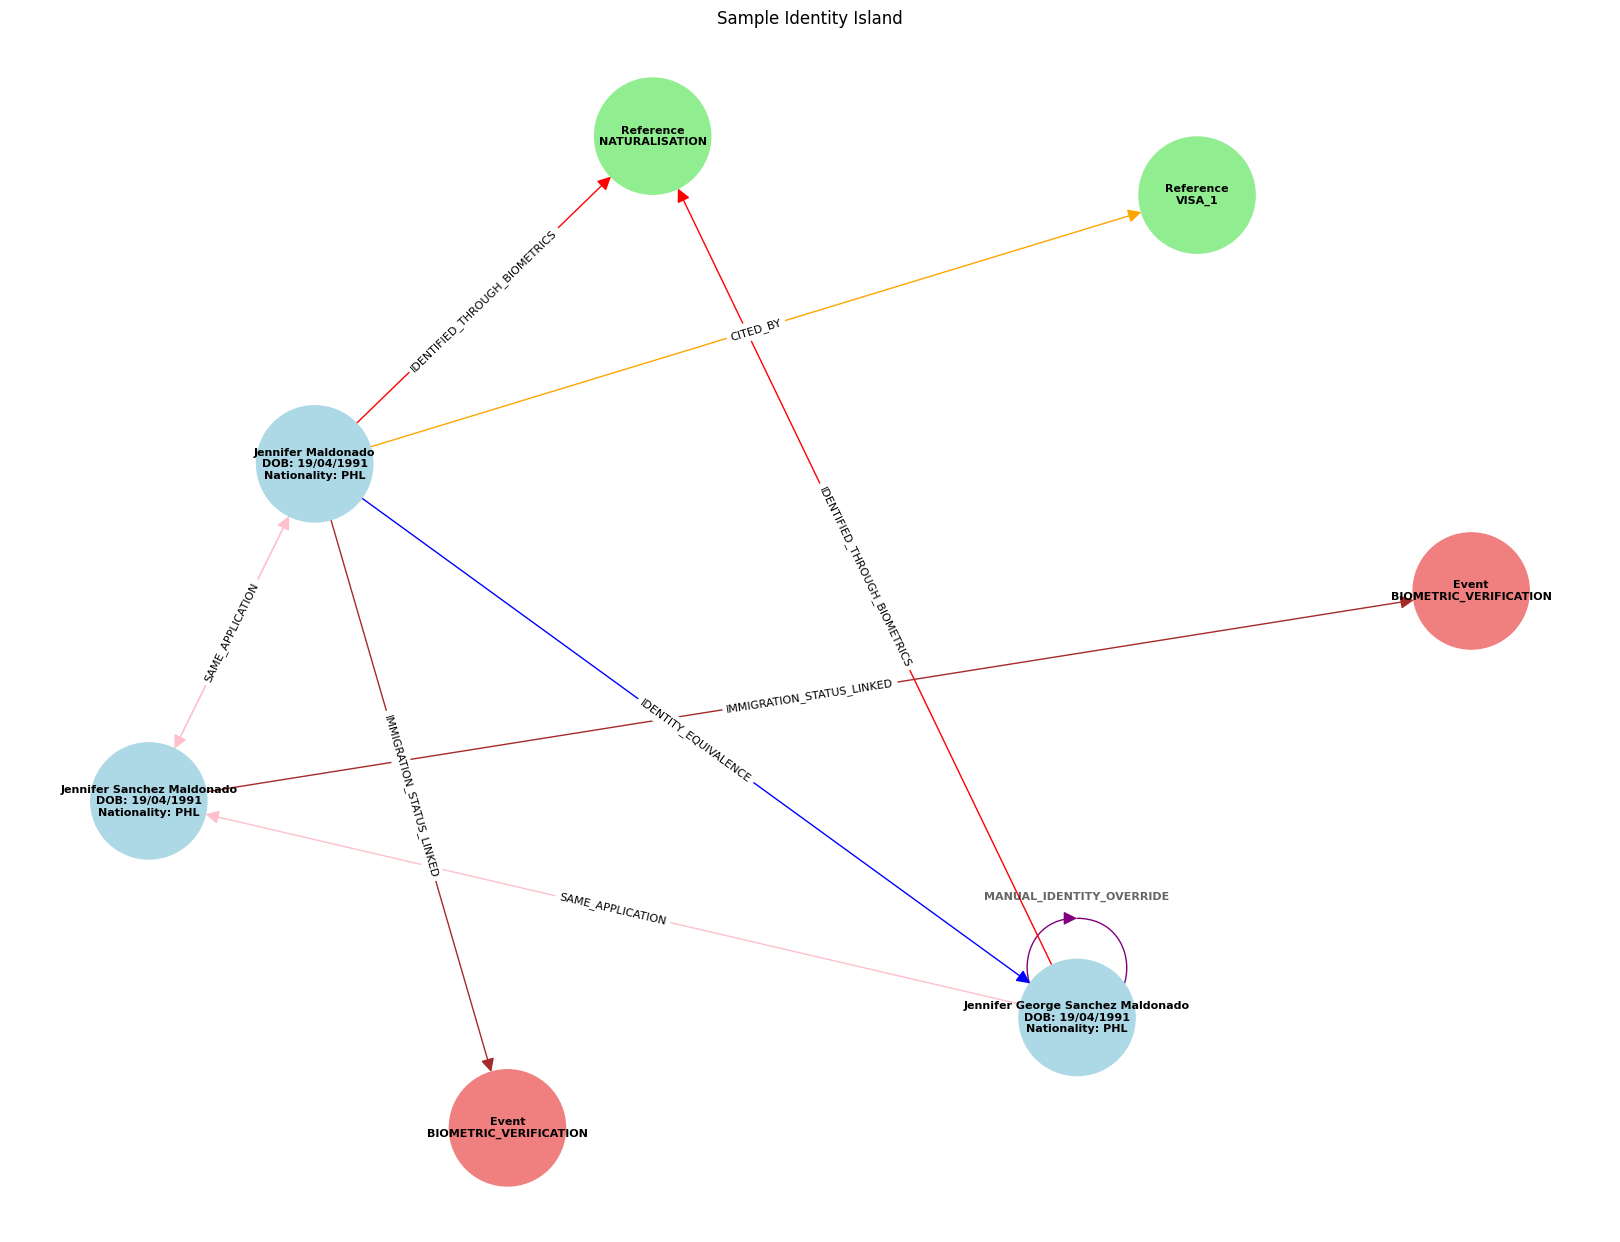

In [174]:
def draw_identity_island(G, sample_island, max_nodes=50):
    # Extract subgraph for the sample island with a limit on the number of nodes
    subgraph_nodes = set(sample_island)
    for node in sample_island:
        if len(subgraph_nodes) > max_nodes:
            break
        subgraph_nodes.update([target for _, target in G.edges(node)])
    subgraph = G.subgraph(subgraph_nodes)
    
    # Define colors for different types of nodes
    node_colors = []
    node_labels = {}
    for node, data in subgraph.nodes(data=True):
        if data['type'] == 'Identity':
            node_colors.append('lightblue')
            node_labels[node] = f"{data['name']}\nDOB: {data['date_of_birth']}\nNationality: {data['nationality']}"
        elif data['type'] == 'Reference':
            node_colors.append('lightgreen')
            node_labels[node] = f"Reference\n{data['doc_type']}"
        elif data['type'] == 'Event':
            node_colors.append('lightcoral')
            node_labels[node] = f"Event\n{data['event_type']}"
    
    # Define edge colors for different types of relationships
    edge_colors = []
    edge_labels = {}
    color_map = {
        'IDENTITY_EQUIVALENCE': 'blue',
        'INCLUDED_IN': 'green',
        'CITED_BY': 'orange',
        'IDENTIFIED_THROUGH_BIOMETRICS': 'red',
        'MANUAL_IDENTITY_OVERRIDE': 'purple',
        'IMMIGRATION_STATUS_LINKED': 'brown',
        'SAME_APPLICATION': 'pink',
    }
    edges = []
    for u, v, d in subgraph.edges(data=True):
        edge_color = color_map.get(d['type'], 'black')
        edges.append((u, v))
        edge_colors.append(edge_color)
        edge_labels[(u, v)] = d['type']

    # Draw the graph nodes and labels
    pos = nx.spring_layout(subgraph, seed=40, k=2.3)  # Layout for better visualization
    plt.figure(figsize=(16, 12))
    nx.draw(subgraph, pos, labels=node_labels, with_labels=True, node_size=7000, node_color=node_colors, font_size=8, font_weight='bold', edgelist=edges, edge_color=edge_colors, arrowsize=20)

    final_edge_labels = {}
    # Handle self-loop labels separately
    for (u, v), label in edge_labels.items():
        if u == v:
            x, y = pos[u]
            dx = 0
            dy = 0.23
            plt.text(x + dx, y + dy, label, fontsize=8, color='black', weight='bold', horizontalalignment='center', verticalalignment='center', alpha=0.6)
        else:
            final_edge_labels[(u, v)] = label


    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=final_edge_labels, font_color='black', font_size=8)

    plt.title("Sample Identity Island")
    # plt.savefig('../data/identity_island_visuals/representation_identity_island.png', format='png', bbox_inches='tight')
    plt.show()

# Draw the diagram
draw_identity_island(G, sample_island)

Here is a visual representation of a sample identity island. The diagram above shows:

1. **Nodes:**
   - **Identity nodes** (light blue)
   - **Reference nodes** (light green)
   - **Event nodes** (light coral)

2. **Edges:**
   - **IDENTITY_EQUIVALENCE** (blue): Represents equivalence or variations of identities.
   - **INCLUDED_IN** (green): Represents inclusion relationships.
   - **CITED_BY** (orange): Indicates references cited by an identity.
   - **IDENTIFIED_THROUGH_BIOMETRICS** (red): Represents biometric identification links.
   - **MANUAL_IDENTITY_OVERRIDE** (purple): Manual overrides of identity.
   - **IMMIGRATION_STATUS_LINKED** (brown): Links to immigration status events.
   - **SAME_APPLICATION** (pink): Represents links from the same application.

These elements together simulate a real-world scenario where identities have multiple variations, references, and events associated with them.

### Load Graph With Anomalies

In [163]:
with open('../data/anomalies_data/synthetic_identity_islands.gpickle', 'rb') as f:
    G_anomalies = pickle.load(f)

print("Synthetic data read complete.")

# Check the number of nodes and edges
num_nodes = G_anomalies.number_of_nodes()
num_edges = G_anomalies.number_of_edges()
print(f"Number of nodes in the graph: {num_nodes}")
print(f"Number of edges in the graph: {num_edges}")

with open('../data/synthetic_data/identity_islands.pkl', 'rb') as f:
    identity_islands = pickle.load(f)

print("Identity Island data read complete.")

Synthetic data read complete.
Number of nodes in the graph: 105
Number of edges in the graph: 123
Identity Island data read complete.


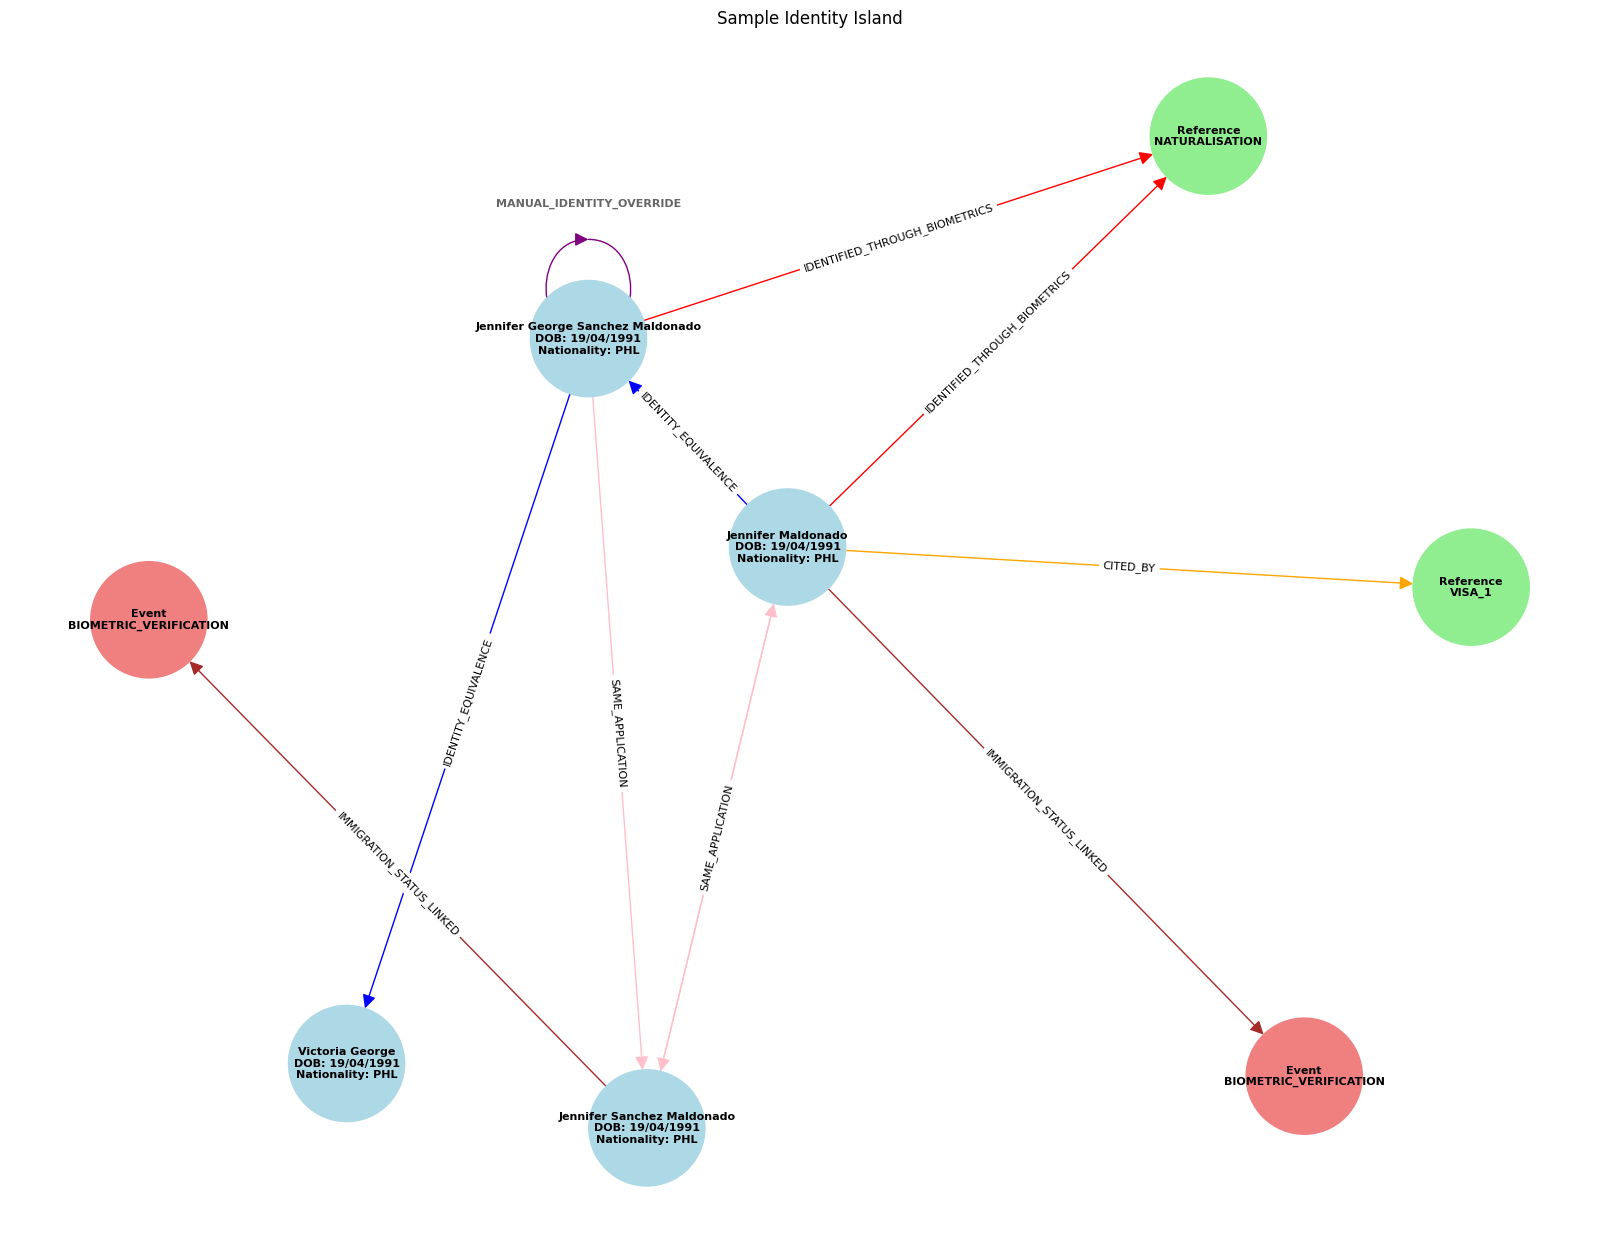

In [173]:
def draw_identity_island(G, sample_island, max_nodes=50):
    # Extract subgraph for the sample island with a limit on the number of nodes
    subgraph_nodes = set(sample_island)
    for node in sample_island:
        if len(subgraph_nodes) > max_nodes:
            break
        subgraph_nodes.update([target for _, target in G.edges(node)])
    subgraph = G.subgraph(subgraph_nodes)
    
    # Define colors for different types of nodes
    node_colors = []
    node_labels = {}
    for node, data in subgraph.nodes(data=True):
        if data['type'] == 'Identity':
            node_colors.append('lightblue')
            node_labels[node] = f"{data['name']}\nDOB: {data['date_of_birth']}\nNationality: {data['nationality']}"
        elif data['type'] == 'Reference':
            node_colors.append('lightgreen')
            node_labels[node] = f"Reference\n{data['doc_type']}"
        elif data['type'] == 'Event':
            node_colors.append('lightcoral')
            node_labels[node] = f"Event\n{data['event_type']}"
    
    # Define edge colors for different types of relationships
    edge_colors = []
    edge_labels = {}
    color_map = {
        'IDENTITY_EQUIVALENCE': 'blue',
        'INCLUDED_IN': 'green',
        'CITED_BY': 'orange',
        'IDENTIFIED_THROUGH_BIOMETRICS': 'red',
        'MANUAL_IDENTITY_OVERRIDE': 'purple',
        'IMMIGRATION_STATUS_LINKED': 'brown',
        'SAME_APPLICATION': 'pink',
    }
    edges = []
    for u, v, d in subgraph.edges(data=True):
        edge_color = color_map.get(d['type'], 'black')
        edges.append((u, v))
        edge_colors.append(edge_color)
        edge_labels[(u, v)] = d['type']

    # Draw the graph nodes and labels
    pos = nx.spring_layout(subgraph, seed=10, k=2.3)  # Layout for better visualization
    plt.figure(figsize=(16, 12))
    nx.draw(subgraph, pos, labels=node_labels, with_labels=True, node_size=7000, node_color=node_colors, font_size=8, font_weight='bold', edgelist=edges, edge_color=edge_colors, arrowsize=20)

    final_edge_labels = {}
    # Handle self-loop labels separately
    for (u, v), label in edge_labels.items():
        if u == v:
            x, y = pos[u]
            dx = 0
            dy = 0.23
            plt.text(x + dx, y + dy, label, fontsize=8, color='black', weight='bold', horizontalalignment='center', verticalalignment='center', alpha=0.6)
        else:
            final_edge_labels[(u, v)] = label


    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=final_edge_labels, font_color='black', font_size=8)

    plt.title("Sample Identity Island")
    # plt.savefig('../data/identity_island_visuals/representation_identity_island_with_anomalies.png', format='png', bbox_inches='tight')
    plt.show()

# Draw the diagram
draw_identity_island(G_anomalies, sample_island)

Here is a visual representation of a sample identity island with various anomalies. The diagram above shows:

1. **Nodes:**
   - **Identity nodes** (light blue)
   - **Reference nodes** (light green)
   - **Event nodes** (light coral)

2. **Edges:**
   - **IDENTITY_EQUIVALENCE** (blue): Represents equivalence or variations of identities.
   - **INCLUDED_IN** (green): Represents inclusion relationships.
   - **CITED_BY** (orange): Indicates references cited by an identity.
   - **IDENTIFIED_THROUGH_BIOMETRICS** (red): Represents biometric identification links.
   - **MANUAL_IDENTITY_OVERRIDE** (purple): Manual overrides of identity.
   - **IMMIGRATION_STATUS_LINKED** (brown): Links to immigration status events.
   - **SAME_APPLICATION** (pink): Represents links from the same application.

These elements together simulate a real-world scenario where identities have multiple variations, references, and events associated with them, along with potential anomalies that can occur.